In [9]:
!pip install "gym[atari, accept-rom-license]==0.26.0"

import gym
gym.__version__

# Not recommended, only for concise demonstration
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.3/710.3 kB 8.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 41.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.0-py3-none-any.whl size=826275 sha256=24262728bc74ac96f6c410b07fd0695a105ccd406225f13ca8f33035aa2d4c61
  Stored in directory: /root/.cache/pip/wheels/cd/da/7c/a034980e59e34687bfb6cfa3a5f3e9b389264a0c59519c59fa
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=d425cefacb17977ef99e76ba0131d1af20c4aa2005f36dbfd3118903c49c3b20
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
# To use GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

!nvidia-smi

In [3]:
gym.__version__

'0.26.0'

# CartPole-v0

https://www.gymlibrary.dev/environments/classic_control/cart_pole/

In [2]:
import gym
env = gym.make('CartPole-v0')


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
first_obs = env.reset()

In [5]:
first_obs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 0.01761518,  0.01406391, -0.02910772,  0.01171143], dtype=float32)

## Action Space: Left, Right

In [7]:
LEFT = 0
RIGHT = 1

In [8]:
act = LEFT
print(f"Taking action {act}")
env.step(act)

Taking action 0


(array([ 0.01789646, -0.18062876, -0.02887349,  0.2950703 ], dtype=float32),
 1.0,
 False,
 {})

## One episode

In [ ]:
terminated = False
truncated = False
env.reset()

obs_history = []
reward_history = []
act_history = []

while not (terminated or truncated):
    act = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(act)

    obs_history.append(obs)
    reward_history.append(reward)
    act_history.append(act)

##Episode End
The episode ends if any one of the following occurs:

Termination: Pole Angle is greater than ±12°
Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)
Truncation: Episode length is greater than 500 (200 for v0)


In [ ]:
episode_reward = sum(reward_history)

# Pong-v0

Atari game rule: https://atariage.com/manual_html_page.php?SoftwareLabelID=587 \\
Gym documentation: https://www.gymlibrary.dev/environments/atari/pong/

In [1]:
import gym
print(gym.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython import display

0.26.0


In [2]:
env = gym.make('Pong-v0', render_mode='rgb_array')

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment Pong-v0 is out of date. You should consider upgrading to version `v4`.
  logger.warn(


In [3]:
first_frame, info = env.reset()
print(np.array(first_frame).shape)

(210, 160, 3)


KeyboardInterrupt: ignored

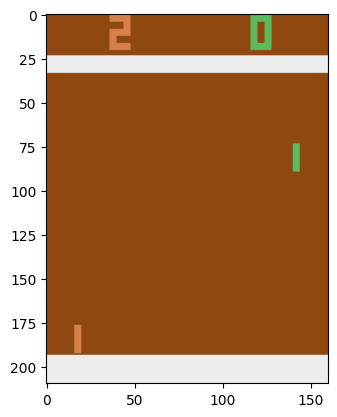

In [4]:
terminated = False
truncated = False
reward_history = []
env.reset()
while not (terminated or truncated):
    frame, reward, terminated, truncated, info = env.step(env.action_space.sample())
    reward_history.append(reward)

    # For display: can be slow
    plt.clf()
    plt.imshow(env.render())
    display.clear_output(wait=True)
    display.display(plt.gcf())


## Episode End

> A player or team scores 1 point when the opponent hits the ball out of bounds or misses a hit. \\

> The first player or team to score 21 points
wins the game.






In [ ]:
episode_reward = np.sum(reward_history)

## Actions
0 NOOP \\
1 FIRE \\
**2 RIGHT** \\
**3 LEFT** \\
4 RIGHTFIRE \\
5 LEFTFIRE \\


In [ ]:
RIGHT = 2
LEFT = 3

## Preprocessing

In [6]:
def preprocess(image):
  """ prepro 210x160x3 uint8 frame into 6400 (80x80) 2D float array """
  image = image[35:195] # crop
  image = image[::2,::2,0] # downsample by factor of 2
  image[image == 144] = 0 # erase background (background type 1)
  image[image == 109] = 0 # erase background (background type 2)
  image[image != 0] = 1 # everything else (paddles, ball) just set to 1
  return np.reshape(image.astype(np.float).ravel(), [80,80])

In [7]:
image, _ = env.reset()
preprocess(image).shape

<ipython-input-6-83d8a33374c3>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.reshape(image.astype(np.float).ravel(), [80,80])


(80, 80)

Stacking, differentiating consecutive frames...